In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder


In [60]:
#model trained on black background
import numpy as np
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

your_data_dir = './data'
your_classes = os.listdir(your_data_dir)
num_classes = len(your_classes)
your_images = []
your_labels = []

import cv2

target_size = (28, 28)

your_images_resized = []
for class_index, class_name in enumerate(your_classes):
    class_dir = os.path.join(your_data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        inverted_gray_image = 255 - gray_image  # Invert colors
        reshaped_image = np.expand_dims(inverted_gray_image, axis=-1)  # Reshape to (28, 28, 1)
        your_images_resized.append(reshaped_image)
        your_labels.append(class_name)

your_images_resized = np.stack(your_images_resized)

(train_images, train_labels),_ = mnist.load_data()
train_images = train_images.reshape((-1, 28, 28, 1))
train_images_inverted = train_images

combined_images = np.concatenate((your_images_resized, train_images_inverted), axis=0)
combined_labels = np.concatenate((your_labels, train_labels), axis=0)

combined_images = combined_images.astype('float32') / 255.0

label_encoder = LabelEncoder()
combined_labels_encoded = label_encoder.fit_transform(combined_labels)
num_classes = len(label_encoder.classes_)
combined_labels_categorical = to_categorical(combined_labels_encoded, num_classes)

X_train, X_test, y_train, y_test = train_test_split(combined_images, combined_labels_categorical, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/10
1555/1555 [==============================] - 18s 11ms/step - loss: 0.2170 - accuracy: 0.9363 - val_loss: 0.1105 - val_accuracy: 0.9684
Epoch 2/10
1555/1555 [==============================] - 17s 11ms/step - loss: 0.0961 - accuracy: 0.9716 - val_loss: 0.1356 - val_accuracy: 0.9616
Epoch 3/10
1555/1555 [==============================] - 17s 11ms/step - loss: 0.0829 - accuracy: 0.9763 - val_loss: 0.1376 - val_accuracy: 0.9665
Epoch 4/10
1555/1555 [==============================] - 17s 11ms/step - loss: 0.0889 - accuracy: 0.9765 - val_loss: 0.1788 - val_accuracy: 0.9613
Epoch 5/10
1555/1555 [==============================] - 17s 11ms/step - loss: 0.1157 - accuracy: 0.9741 - val_loss: 0.4204 - val_accuracy: 0.9408
Epoch 6/10
1555/1555 [==============================] - 17s 11ms/step - loss: 0.1737 - accuracy: 0.9728 - val_loss: 0.3872 - val_accuracy: 0.9596
Epoch 7/10
1555/1555 [==============================] - 17s 11ms/step - loss: 0.2214 - accuracy: 0.9733 - val_loss: 0.5708 -

In [61]:
model.save('model_with_black_background.h5')

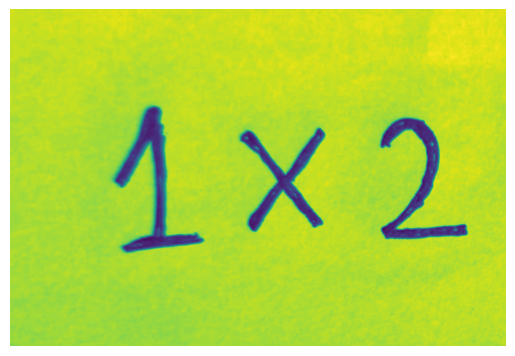

1/1 [==============================] - 0s 9ms/step


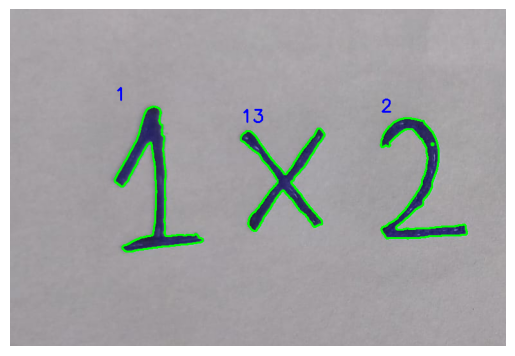

1*2=2


In [92]:
def calculate(final_list):
    finalstr = ''
    x = 0
    for i in final_list:
        if(i == '10'):
            if(x > 0):
                finalstr = finalstr+str(x)
            finalstr = finalstr+'/'
            x=0
        elif(i == '11'):
            if(x > 0):
                finalstr = finalstr+str(x)
            finalstr = finalstr+'-'
            x=0
        elif(i == '12'):
            if(x > 0):
                finalstr = finalstr+str(x)
            finalstr = finalstr+'+'
            x=0
        elif(i == '13'):
            if(x > 0):
                finalstr = finalstr+str(x)
            finalstr = finalstr+'*'
            x=0    
        else:
            x = 10*x + int(i)
    finalstr = finalstr+str(x)        
    return finalstr        

model = keras.models.load_model('./model_with_black_background.h5')
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

im = cv.imread('final_final.jpeg')
assert im is not None, "File could not be read, check with os.path.exists()"

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
imgray = cv.GaussianBlur(imgray, (5,5), 0)

abc, imbw = cv.threshold(imgray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(imbw, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(im, contours, -1, (0, 255, 0), 2)

im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

plt.imshow(imgray)
plt.axis('off')
plt.show()

final_dict = {}

equation_components = []
padding = 100
# Iterate over the contours
for contour in contours:
    area = cv.contourArea(contour)
    if area>1000:
        x, y, w, h = cv.boundingRect(contour)
        digit_region = imbw[y-int(0.20*h):y + h+int(0.20*h), x-int(0.20*w):x + w+int(0.20*w)]
        
        digit_region = cv.resize(digit_region, (28, 28))
        digit_region = digit_region.reshape(1, 28, 28, 1).astype('float32') / 255.0
       

        prediction = model.predict(digit_region)
        predicted_label = labels[np.argmax(prediction)]
        
        final_dict.update({predicted_label:x})
       
        cv.putText(im_rgb, predicted_label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

plt.imshow(im_rgb)
plt.axis('off')
plt.show()

keys = list(final_dict.keys())
values = list(final_dict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
final_list = list(sorted_dict.keys())
print(calculate(final_list) + '=' + str(eval(calculate(final_list))))